<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/ejer-22-11-LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística con Gradiente Descendente

###  Librerías y carga de datos

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [7]:
data = pd.read_csv("https://drive.google.com/uc?id=1fMmyhTvj8RAJxMdFtI7zB5j8egQKx30O")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Visualizar Datos Originales

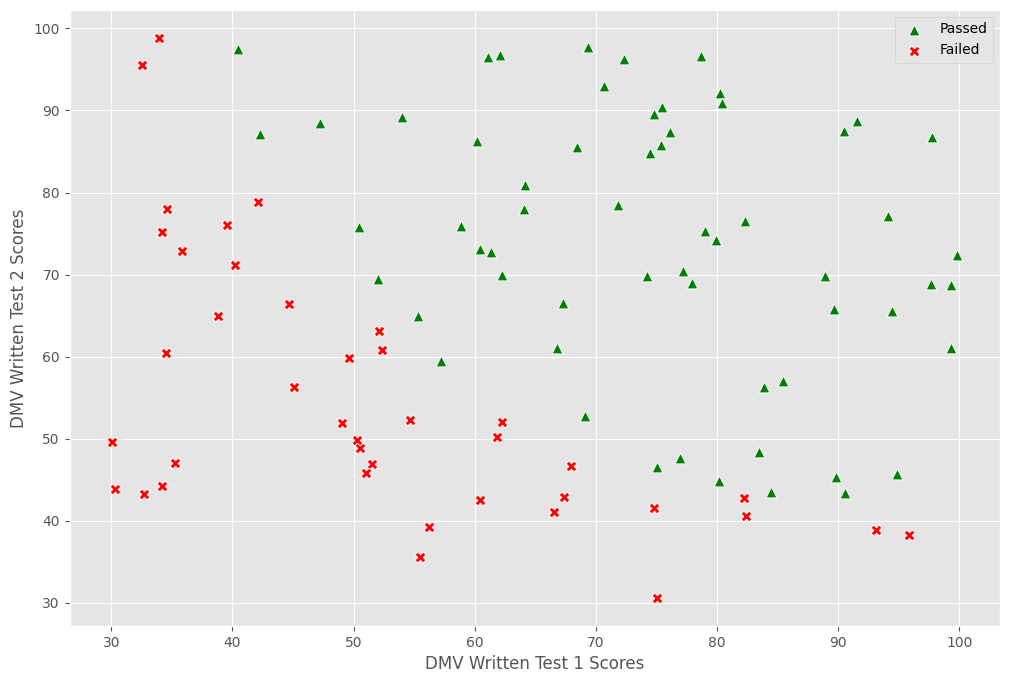

In [10]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

### Definimos de la función logística $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

Podemos definir nuestra   hipótesis como sigue, $h(X) = g(X \theta)$
donde:
- $\theta$ es el vector de coeficientes
- $X$ es el vector de todas las observaciones al cual le añadimos una columna de 1 para calcular el primer valor del vector $\theta$.

$h(X)$  nos da la probabilidad de que nuestra salida sea 1, lo que significa:
- Si $ X \theta \geqslant 0 $, entonces $h(X) \geqslant 0.5$, entonces la predicción es $y = 1$
- Si $ X \theta < 0 $, entonces $h(X) < 0.5$, entonces la predicción es $y = 0$

### Cálculo de la Función de Coste  $J(\theta)$ y el Gradiente

En la regresión Logística debemos minimizar la función de coste

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

Siendo el gradiente de esta función de coste:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Podemos observar que la expresión es de la misma forma que la utilizada eb la regresión lineal, que en forma vectorial se puede escribir de la forma:

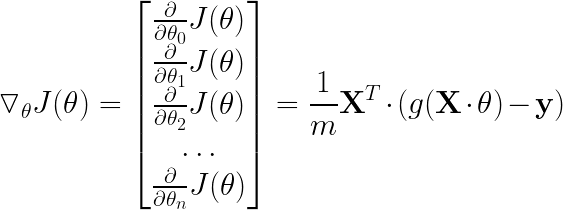

### Gradiente Descendente

Minimizamos la función de coste $J(\theta)$  actualizando la siguiente ecuación (algoritmo del gradiente descendente) repitiendo hasta convergencia :  
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$    
 (actualizar simultaneamente $\theta_j$ para todo $j$)

In [11]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [16]:
# ompeobación
logistic_function(0)

0.5

In [17]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    return cost